# Gaze Vector 

In this notebook, we will show how to extract and visualize the human's eye gaze vector. The gaze vector highly useful for multiple tasks such as eyes on road estimation. 

To learn more about gaze estimation tasks and how to approach them with synthetic data, take a look at our [gaze estimation playbook](https://docs.datagen.tech/en/latest/Playbooks/Gaze%20estimation.html)!

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datagen

from dghelpers import imshow
from IPython.display import Image

## Creation of a Dataset container

In [2]:
DATASET_PATH= '../resources/faces_1'
dp = datagen.load(DATASET_PATH)[3]

## Gaze vector

First, let's extract the gaze vector in camera coordinates. <br>
To do so, we'll apply the extrinsic matrix without the translation row (since we're working with vectors).

In [3]:
extrinsic_rotation = dp.camera_metadata.extrinsic_matrix[:, :3]

gaze_left_world = dp.actor_metadata.eye_gaze.axis_directions.left_eye.visual_axis_direction
gaze_right_world = dp.actor_metadata.eye_gaze.axis_directions.right_eye.visual_axis_direction

gaze_left_cam = extrinsic_rotation @ gaze_left_world
gaze_right_cam = extrinsic_rotation @ gaze_right_world

Everything is now ready for plotting!

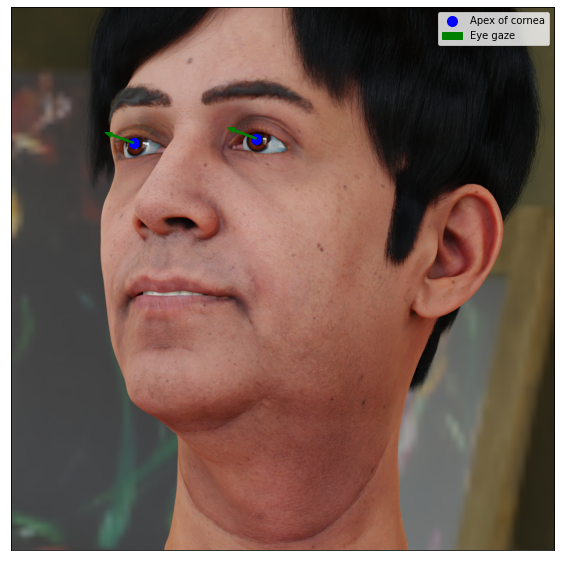

In [4]:
eye_left_img = dp.actor_metadata.apex_of_cornea_point.coords_2d[0].left_eye
eye_right_img = dp.actor_metadata.apex_of_cornea_point.coords_2d[0].right_eye

gaze_arrow_length = 80
imshow(dp.visible_spectrum)
plt.scatter(*np.flip(eye_left_img), color='b', s=100, label='Apex of cornea')
plt.scatter(*np.flip(eye_right_img), color='b', s=100)
plt.arrow(*np.flip(eye_left_img), *(gaze_arrow_length * gaze_left_cam[:2]), color='g', label='Eye gaze', width=3)
plt.arrow(*np.flip(eye_right_img), *(gaze_arrow_length * gaze_right_cam[:2]), color='g', width=3)
plt.legend()

## Translation from gaze vector to Euler angles

This is the coordinates system viewed from the camera:

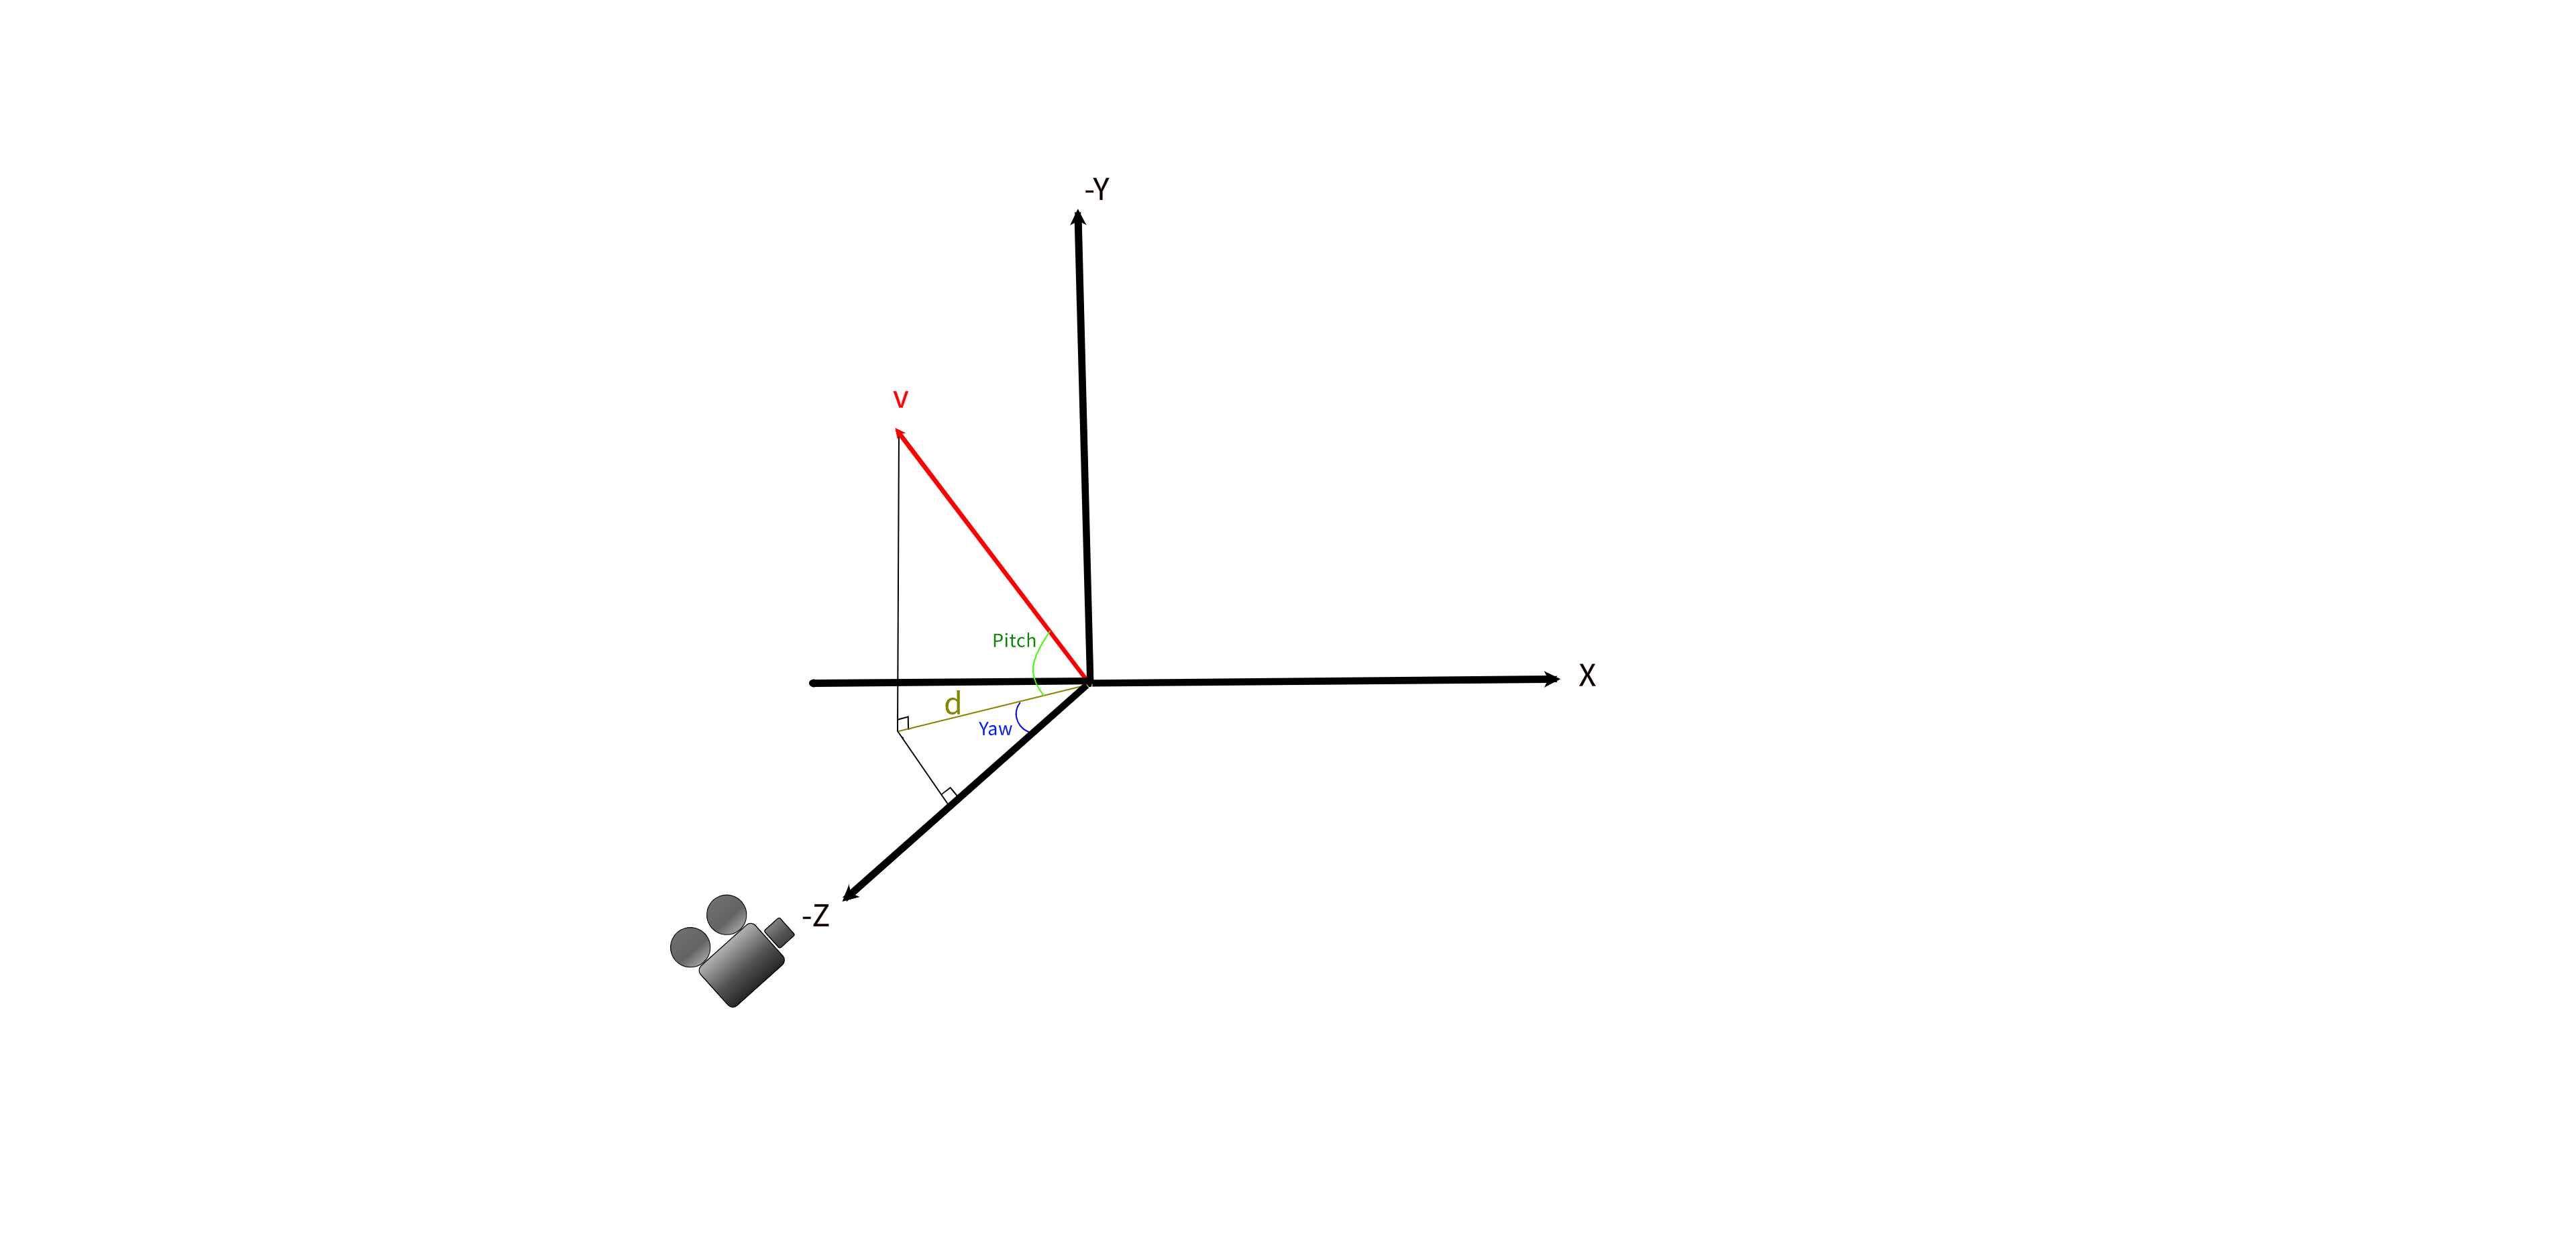

In [5]:
Image(filename='../docs/assets/eye_gaze.png', width=1200)

$\vec{v} = (x, y, z)$ is the gaze vector.<br> $\vec{d} = (x, 0, z)$ is the projection of gaze vector on XZ plane. <br> Pitch and yaw are defined as below:<br><br>
$d = \sqrt{x^2 + z^2} $<br>
$cos(yaw) = -z/d$<br>
$tan(pitch) = y/d$<br>

Therefore, after adjusting with the sign of X to get a signed yaw value:<br>
$yaw = sign(x) * arccos (-z/d)$<br>
$pitch = arctan2(y, d)$<br>

In [6]:
d = np.sqrt(gaze_left_cam[0]**2 + gaze_left_cam[2]**2)
eye_yaw = np.sign(gaze_left_cam[0]) * np.rad2deg(np.arccos(-gaze_left_cam[2]/ d))
eye_pitch = np.rad2deg(np.arctan2(gaze_left_cam[1], d))

print(f'Left eye gaze yaw: {eye_yaw} degrees')
print(f'Left eye gaze pitch: {eye_pitch} degrees')

Left eye gaze yaw: -32.38018997792298 degrees
Left eye gaze pitch: -11.512777748782607 degrees
